<a href="https://colab.research.google.com/github/qmeng222/transformers-for-NLP/blob/main/Pipeline_Text_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# `wget` command is a utility for downloading files from the internet.
# `-nc` is an option for the `wget` command. -nc stands for "no-clobber." It instructs wget not to overwrite files that already exist in the current directory. If the file you're trying to download already exists, the -nc flag prevents it from being downloaded again.
!wget -nc http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

File ‘spa-eng.zip’ already there; not retrieving.



In [81]:
# extract the zip file:
!unzip -nq spa-eng.zip
# `-n`: avoid overwriting existing files (if a file with the same name already exists in the destination folder, the file won't be replaced)
# `-q`: "quiet mode" (suppress the output or any unnecessary information, making the extraction process less verbose)

In [82]:
# list all files and directories in the current directory:
!ls

sample_data  spa-eng  spa-eng.zip


In [83]:
# list files in the `spa-eng` folder:
!ls spa-eng

_about.txt  spa.txt


In [84]:
# display the beginning ten lines of the "spa.txt" file located in the "spa-eng" directory:
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


👆 Note: A eng string could have multiple spa translations!

In [85]:
# compile eng-spa translations:
eng2spa = {}
for line in open('spa-eng/spa.txt'):
  line = line.rstrip()
  eng, spa = line.split("\t") # both eng and spa are strings
  if eng not in eng2spa: # for new eng occurance
    eng2spa[eng] = [] # create a empty list to store all corresponding spa strings
  # else append to list:
  eng2spa[eng].append(spa)

In [86]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [87]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
# NLTK: Natural Language Toolkit
# sentence_bleu function: calculate the BLEU (Bilingual Evaluation Understudy) score for a single sentence or a pair of sentences
# SmoothingFunction class: handle cases where there may be mismatches between candidate and reference sentences, especially when the lengths of the sentences are different

In [88]:
# from NLTK's tokenize module, import the `RegexpTokenizer` class:
from nltk.tokenize import RegexpTokenizer

# create an instance of the RegexpTokenizer class & initialize it with a regular expression pattern:
tokenizer = RegexpTokenizer(r'\w+')
# \w represents any word character (letters, digits, underscores)
# + indicates one or more occurrences of the preceding pattern
# so the tokenizer object will break the text into words and treat spaces and punctuation as token separator

In [89]:
# check how the tokenizer works:
tokenizer.tokenize('¿Qué me cuentas?'.lower())

['qué', 'me', 'cuentas']

In [90]:
tokens = tokenizer.tokenize('¿Qué me cuentas?'.lower())
sentence_bleu([tokens], tokens)
# calculate the Bilingual Evaluation Understudy score
# for a single candidate sentence (specified by the tokens)
# compared to a list of reference sentences (specified by the [tokens])

1.2213386697554703e-77

# Scratch: wo/ a smoothing function

In [91]:
sentence_bleu([['hi']], ['hi'])

1.821831989445342e-231

# Scratch: w/ a smoothing function

In [92]:
smoother = SmoothingFunction()
sentence_bleu(['hi'], 'hi', smoothing_function=smoother.method4)

0.2213885886251307

In [93]:
sentence_bleu(['hi there'.split()], 'hi there'.split())

1.491668146240062e-154

In [94]:
sentence_bleu(['hi there friend'.split()], 'hi there friend'.split())

1.2213386697554703e-77

# With matching tokens in candidate and reference:

In [95]:
sentence_bleu([[1,2,3,4]], [1,2,3,4])

1.0

In [96]:
eng2spa_tokens = {}
for eng, spa_list in eng2spa.items():
  spa_list_tokens = []
  for text in spa_list:
    tokens = tokenizer.tokenize(text.lower())
    spa_list_tokens.append(tokens)
  eng2spa_tokens[eng] = spa_list_tokens

In [97]:
!pip install transformers sentencepiece transformers[sentencepiece]

In [98]:
from transformers import pipeline

# find model="xxx" at https://huggingface.co/models
translator = pipeline("translation",
                      model='Helsinki-NLP/opus-mt-en-es', device=0)

In [99]:
translator("I like eggs and ham")

[{'translation_text': 'Me gustan los huevos y el jamón.'}]

In [100]:
eng_phrases = list(eng2spa.keys())
print(len(eng_phrases))
eng_phrases[:3]

102904


['Go.', 'Hi.', 'Run!']

# Reduce dimension for the large number of samples:

In [101]:
# slice from index 20,000 (inclusive) to index 21,000 (exclusive):
eng_phrases_subset = eng_phrases[20_000:21_000]
# `_` is used to improve the readability of large numbers

In [102]:
# takes 2m on GPU:
translations = translator(eng_phrases_subset)

In [103]:
# print out the 1st translation to check the format:
translations[0]

{'translation_text': 'Tom está en el jardín.'}

# Compute the BLEU score for each translation:

In [104]:
scores = []
for eng, pred in zip(eng_phrases_subset, translations):
  matches = eng2spa_tokens[eng]

  # tokenize translation
  spa_pred = tokenizer.tokenize(pred['translation_text'].lower())

  score = sentence_bleu(matches, spa_pred)
  scores.append(score)

# Visualize the BLEU scores distribution:

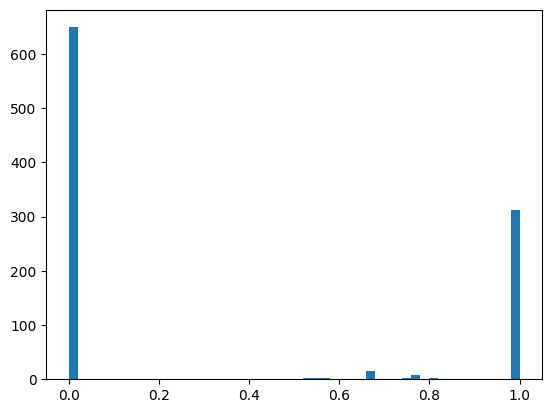

In [105]:
import matplotlib.pyplot as plt
plt.hist(scores, bins=50);

# Compute the average BLEU score:

In [106]:
import numpy as np

np.mean(scores)

0.3383504014386889

# Translate a random sentence from the subset:

In [107]:
np.random.seed(1)

def print_random_translation():
  i = np.random.choice(len(eng_phrases_subset))
  eng = eng_phrases_subset[i]
  print("EN:", eng)

  translation = translations[i]['translation_text']
  print("ES Translation:", translation)

  matches = eng2spa[eng]
  print("Matches:", matches)

In [108]:
print_random_translation()

EN: Tom isn't that young.
ES Translation: Tom no es tan joven.
Matches: ['Tom no es tan joven.']


In [109]:
print_random_translation()

EN: Tom's Mary's brother.
ES Translation: Tom es el hermano de Mary.
Matches: ['Tom es el hermano de Mary.']


In [110]:
print_random_translation()

EN: Can you describe them?
ES Translation: ¿Puede describirlos?
Matches: ['¿Podrías describirles?', '¿Podrías describirlos?']
